In [1]:
import util
import numpy as np

# Gaussian Process Regression

Gaussian Processes are a non-parametric method of supervised learning that outputs the prediction on a new input after certain observations $(X, y)$. Unlike other generative approaches that learn the distribution of underlying data and weights, GPs aim to learn directly the distribution over functions $f: X \in R^d \rightarrow y \in R^n$ directly over the function space.

In a Gaussian Process, given an input point $x \in R^d$, we sample a function $f \text{~}GP(m(x), k(x, x'))$ which is a Gaussian distribution, and output the value of $f$ evaluated on $x, f(x)$. Then, given $n$ observations $x_1,.., x_n$, we have that for any $f$ sampled from the prior distribution $f | X$, the output is given as:

$$
\begin{equation*}
f = \{f(x_1),...,f(x_n) \}
\end{equation*}
$$

and the mean and covariance given by:

$$
\begin{equation*}
\mu = \{E[f(x_1)],...,E[f(x_n)]\} = \{m(x_1),...,,m(x_n)\}
\end{equation*}
$$

$$
\begin{equation*}
K = [K_{ij} = \kappa(x_i, x_j)]_{n \times n}
\end{equation*}
$$

Where the kernel function $\kappa$ explicitly defines the covariance matrix $K$ of the distribution. In this example, we use a common kernel function known as the Gaussian or Radial Basis Function(RBF), defined as:

$$
\begin{equation*}
\kappa(x, x') = \text{exp}^{-\frac{|x - x'|^2}{2l^2}}
\end{equation*}
$$

where $l$ is the length scale parameter. Intuitively, the RBF kernel measures the notion of similarity between 2 data points $x, x'$. For simplicity, we shall set $l=1$.

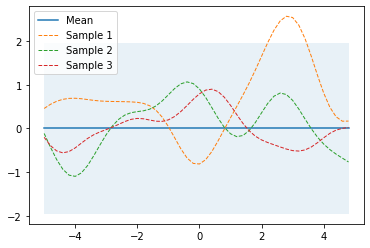

In [2]:
from gaussian_processes import gp_regression, gp_regression_fast
from gp_plot import plot_gp
from util import rbf_kernel

# Random input points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior distribution over functions
mu = np.zeros(X.shape)
cov = rbf_kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

Often we define a prior on the probability distribution of functions $f|X$ with mean $m(x) = 0$ and covariance matrix $K$ on observations $(X, y)$. In this case, we wish to ask the question: What is the most likely value of new inputs $X^*$ given the observations we make? More formally, let $f^*$ be the function that is sampled from the posterior probability distribution $f*|X,y,X^*$. Then, by property of Gaussian Processes, we have the following joint distribution:

$$
\begin{equation*}
\begin{bmatrix}
f \\
f^*
\end{bmatrix}
\end{equation*} \text{~}GP
\left(0, 
\begin{bmatrix}
\kappa(X, X) & \kappa(X, X^*)\\
\kappa(X^*, X) & \kappa(X^*, X^*)
\end{bmatrix}
\right)
$$

This allows us to derive the posterior probability of $f^*$ with the following mean and covariance matrix(Full details can be found in section 2.2 of GPML textbook):

$$
\begin{equation*}
\bar{f^*} = E[f^*|X,y,X^*] = {\kappa(X, X^*)}^T[\kappa(X, X) + \sigma^2_nI]^{-1}y
\end{equation*}
$$

$$
\begin{equation*}
\text{cov}(f^*) = \kappa(X^*, X^*) - \kappa(X^*, X)[K(X, X) + \sigma^2_nI]^{-1}\kappa(X^*, X)
\end{equation*}
$$

Where the mean vector $f^*$ represents the expected predictions of $f^*$ on new inputs $X^*$. For the full algorithm used, see Algorithm 2.1 in GPML.

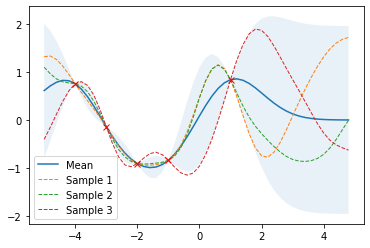

In [3]:
# Generate noiseless training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = gp_regression(X_train, y_train, X)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=y_train, samples=samples)

/media/wychoong/New Volume/GPML/gp_plot.py:10: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = 1.96 * np.sqrt(np.diag(cov))


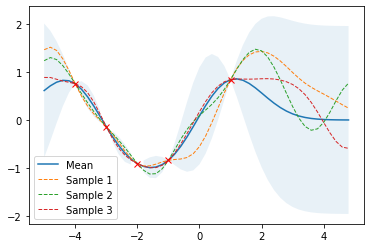

In [4]:
# Version using Cholesky Decomposition - Only improves speed of computation of inverse
mu_ss, cov_ss = gp_regression_fast(X_train, y_train, X)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_ss, cov_ss, X, X_train=X_train, Y_train=y_train, samples=samples)